# Large Dataset Experiments - CNN vs Vision Transformer

This notebook runs experiments comparing CNN (ResNet) and Vision Transformer (ViT) on large datasets (CIFAR-100).

## Step 1: Setup and Install Dependencies

In [1]:
# Install required packages
!pip install torch torchvision torchmetrics pyyaml matplotlib seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 59.5 MB/s eta 0:00:00


## Step 2: Upload Project Files

You have two options:

### Option A: Upload files directly (if you have the files locally)
1. Upload `CNN.py`, `VisionTransormer.py`, `config.yaml` to the root directory
2. Upload all files from `large-dataset/` folder
3. Upload `cka/metrics.py` and `cka/hook_manager.py` (if needed)

### Option B: Clone from GitHub (if your project is on GitHub)
Uncomment and modify the cell below:

In [2]:
# Option B: Clone from GitHub (uncomment and modify if needed)
# !git clone https://github.com/yourusername/your-repo.git
# %cd your-repo

## Step 3: Verify File Structure

Check that all necessary files are present:

In [6]:
import os

# Check for required files (notebook is inside `large-dataset`)
# So model/config files are one level up, and local experiment files are in this folder.
required_files = [
    'CNN.py',
    'VisionTransormer.py',
    'config.yaml',
    'large-dataset/evaluate.py',
    'large-dataset/load_coyo_dataset.py',
    'large-dataset/run_large_dataset_experiment.py',
    'cka/metrics.py'
]

print("Checking required files...")
for file in required_files:
    if os.path.exists(file):
        print(f"✓ {file}")
    else:
        print(f"✗ {file} - MISSING!")

print("\nFile check complete!")

Checking required files...
✓ CNN.py
✓ VisionTransormer.py
✓ config.yaml
✓ large-dataset/evaluate.py
✓ large-dataset/load_coyo_dataset.py
✓ large-dataset/run_large_dataset_experiment.py
✓ cka/metrics.py

File check complete!


## Step 4: Run Large Dataset Experiment

Run the experiment with default settings (CIFAR-100, 10 epochs):

In [7]:
import sys
import os

# Change to large-dataset directory
os.chdir('large-dataset')

# Run experiment with CIFAR-100
!python run_large_dataset_experiment.py \
    --dataset cifar100 \
    --num_epochs 10 \
    --config ../config.yaml \
    --output_dir ./results

# Or run with Coyo-labeled-300m dataset
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 10 \
#     --max_samples 50000 \
#     --num_classes 500 \
#     --config ../config.yaml \
#     --output_dir ./results

Using device: cuda

Loading cifar100 dataset...
100% 169M/169M [00:13<00:00, 12.4MB/s]
Dataset loaded: 100 classes
Training samples: 50000
Test samples: 10000

Initializing CNN (ResNet)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 214MB/s]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

## Step 5: Run with Custom Parameters

You can customize the experiment parameters:

In [ ]:
# Example: More epochs for better convergence
# !python run_large_dataset_experiment.py \
#     --dataset cifar100 \
#     --num_epochs 20 \
#     --config ../config.yaml \
#     --output_dir ./results

# Example: Coyo-labeled-300m with custom parameters
# !python run_large_dataset_experiment.py \
#     --dataset coyo \
#     --num_epochs 20 \
#     --max_samples 100000 \
#     --num_classes 1000 \
#     --config ../config.yaml \
#     --output_dir ./results

## Step 6: View Results

Display the generated plots and results:

Latest experiment: results/large_dataset_cifar100_20251201_235002

Experiment Results:
CNN Accuracy: 29.11%
ViT Accuracy: 28.61%
CNN F1-Macro: 0.2617
ViT F1-Macro: 0.2465

Displaying confusion_matrix_cnn.png:



Displaying confusion_matrix_vit.png:



Displaying per_class_metrics_comparison.png:


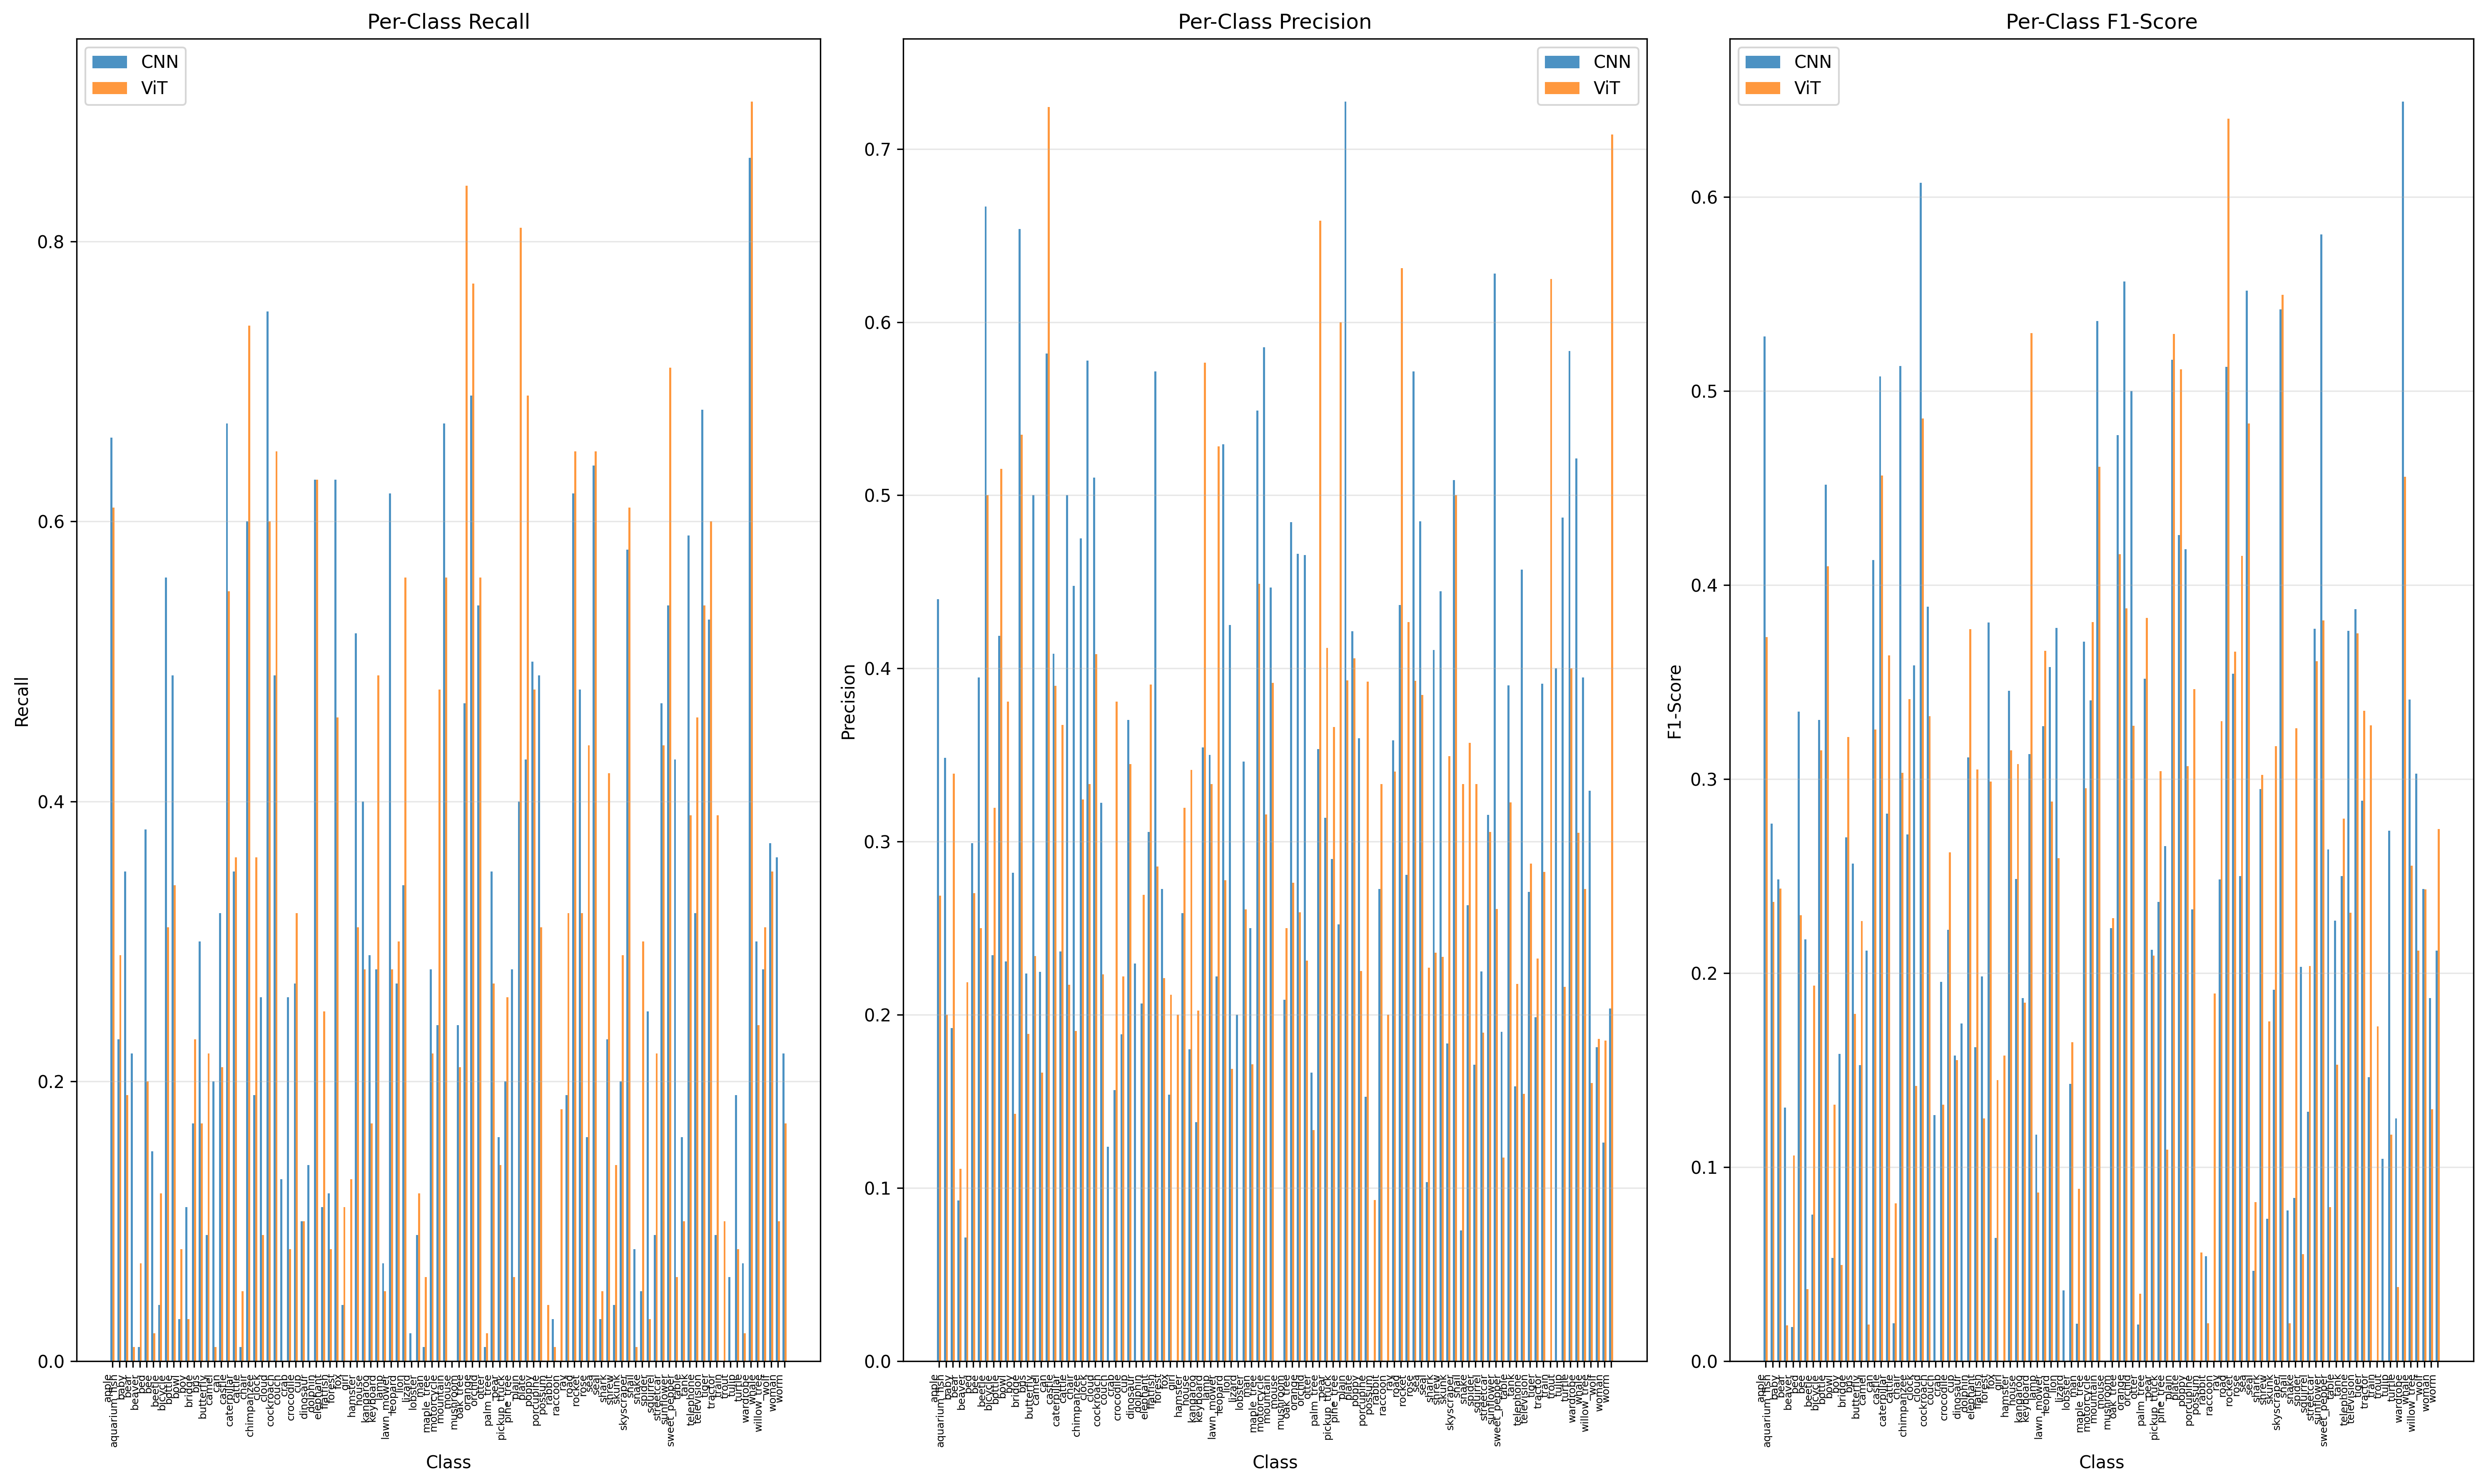


Displaying training_curves.png:


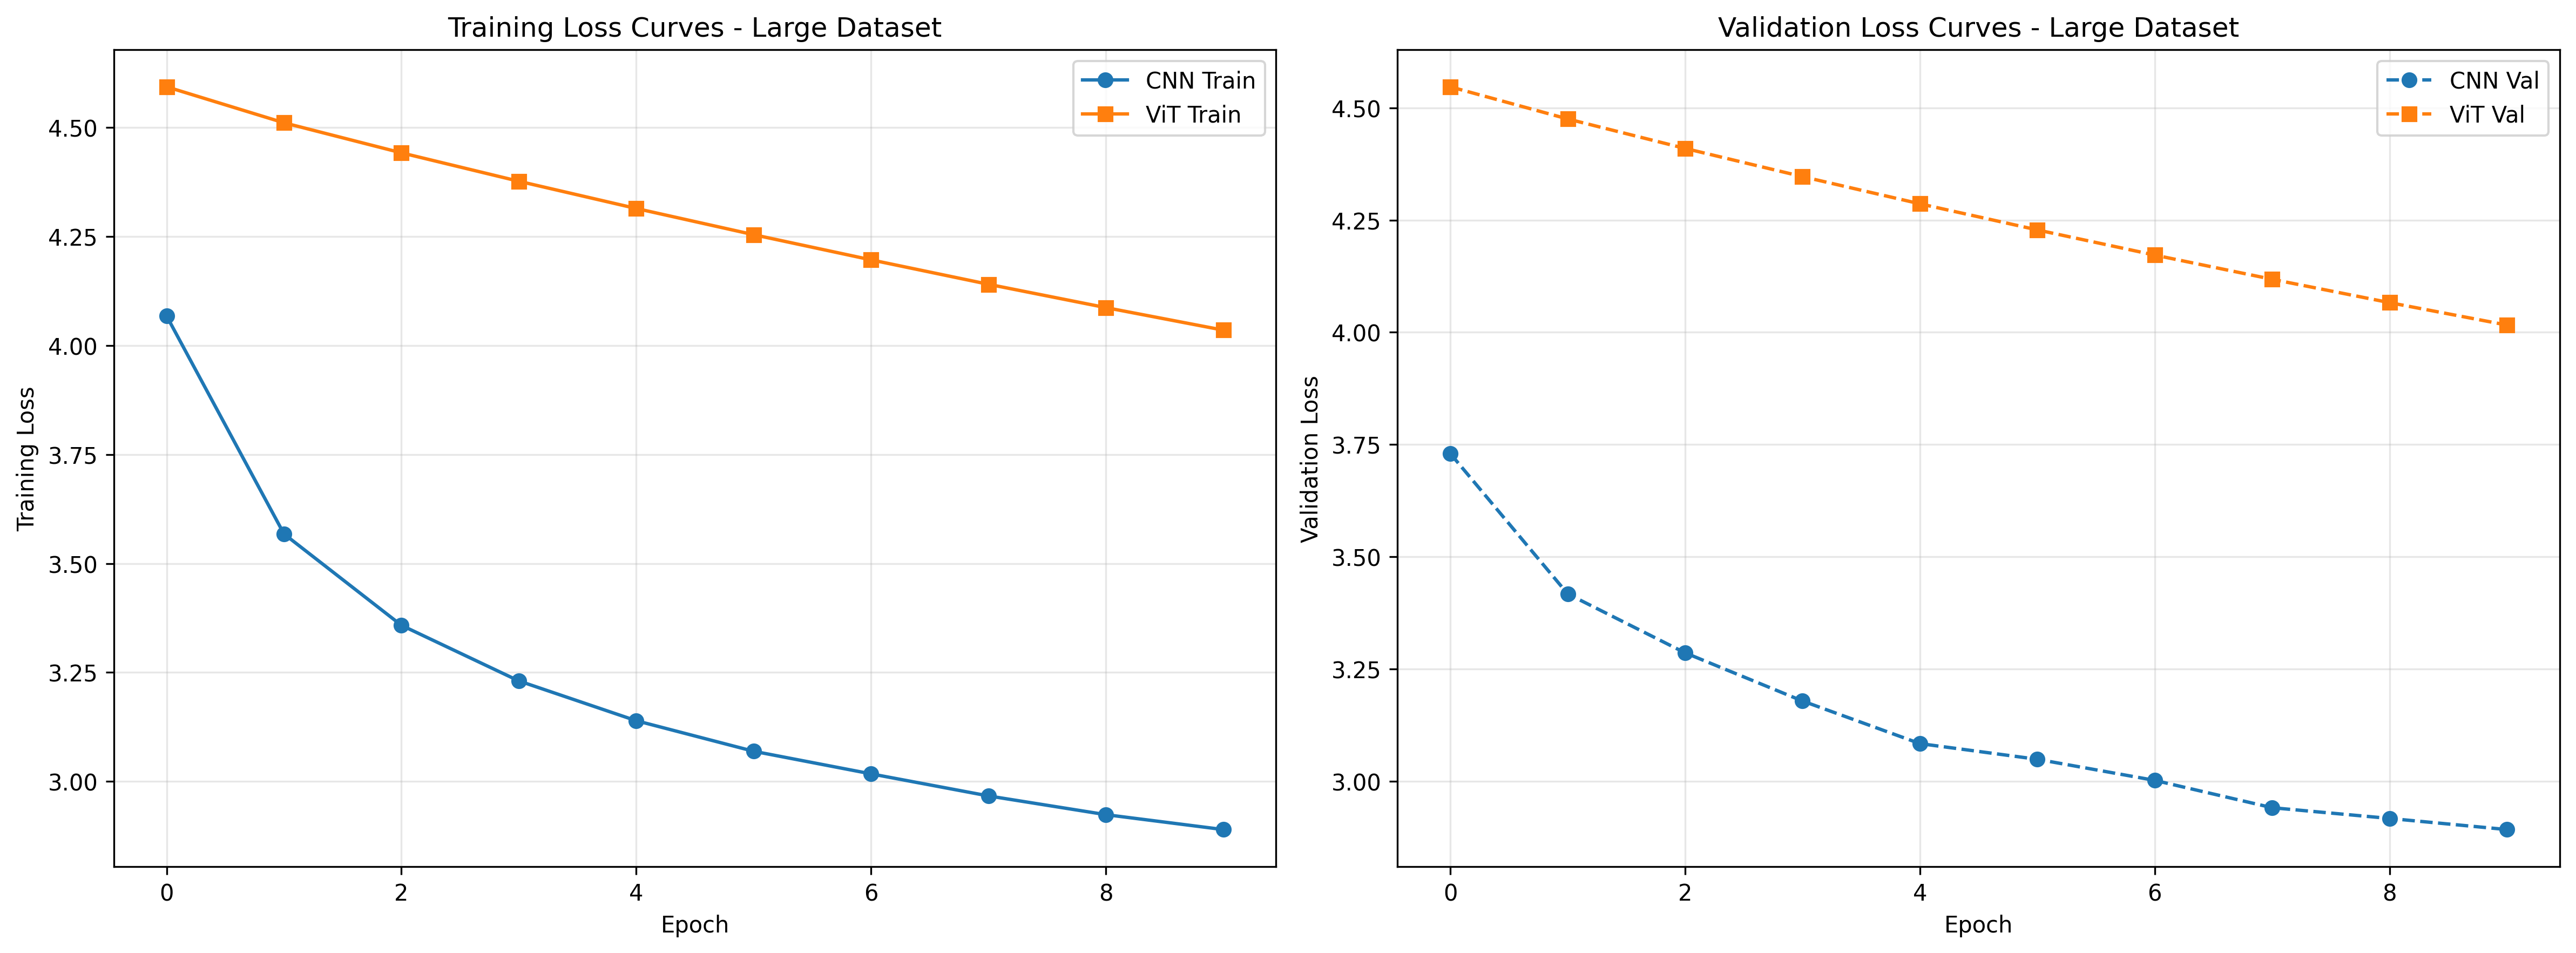

In [8]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob
import json

# Find the most recent experiment directory
result_dirs = sorted(glob.glob('results/large_dataset_*'), key=os.path.getmtime, reverse=True)
if result_dirs:
    latest_dir = result_dirs[0]
    print(f"Latest experiment: {latest_dir}")

    # Display results JSON
    if os.path.exists(f"{latest_dir}/results.json"):
        with open(f"{latest_dir}/results.json", 'r') as f:
            results = json.load(f)
        print("\nExperiment Results:")
        print(f"CNN Accuracy: {results['cnn_metrics']['accuracy']*100:.2f}%")
        print(f"ViT Accuracy: {results['vit_metrics']['accuracy']*100:.2f}%")
        print(f"CNN F1-Macro: {results['cnn_metrics']['f1_macro']:.4f}")
        print(f"ViT F1-Macro: {results['vit_metrics']['f1_macro']:.4f}")

    # Display plots from charts folder
    charts_dir = os.path.join(latest_dir, 'charts')
    plot_files = [
        'confusion_matrix_cnn.png',
        'confusion_matrix_vit.png',
        'per_class_metrics_comparison.png',
        'training_curves.png'
    ]

    for plot_file in plot_files:
        plot_path = os.path.join(charts_dir, plot_file)
        if os.path.exists(plot_path):
            print(f"\nDisplaying {plot_file}:")
            display(Image(plot_path))
        else:
            print(f"Chart not found: {plot_path}")
else:
    print("No experiment results found. Run the experiment first.")

## Step 7: Download Results

Download the results folder to your local machine:

In [ ]:
from google.colab import files
import zipfile
import shutil

# Find latest results directory
result_dirs = sorted(glob.glob('results/large_dataset_*'), key=os.path.getmtime, reverse=True)
if result_dirs:
    latest_dir = result_dirs[0]

    # Create zip file
    zip_filename = f"{os.path.basename(latest_dir)}.zip"
    shutil.make_archive(latest_dir, 'zip', latest_dir)

    # Download
    files.download(zip_filename)
    print(f"Downloaded {zip_filename}")
else:
    print("No results to download.")